<a href="https://colab.research.google.com/github/angyf/proyecto/blob/main/Procesamiento_de_Lenguaje_Natural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Poswork 7

La siguiente información corresponde a las reacciones que tienen las personas al hacer uso de ciertos medicamentos como tratammiento. 

In [ ]:
import re
import nltk
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
drogas=pd.read_csv('https://raw.githubusercontent.com/angyf/proyecto/main/test_tOlRoBf.csv')
drogas=drogas['text']
drogas.head()

0    256 (previously stable on natalizumab), with 5...
1    On fingolimod and have been since December 201...
2    Apparently it's shingles! :-/ I do have a few ...
3    If the Docetaxel doing once a week x3 weeks th...
4    CC, Stelara worked in a matter of days for me....
Name: text, dtype: object

Realizamos la limpieza de nuestro texto

In [ ]:
drogas = drogas.str.lower()
drogas = drogas.str.replace('[^\w\s]', '')
drogas = drogas.str.replace('\\n', '')
drogas = drogas.str.replace('\d','')
drogas = drogas.str.strip()
drogas = drogas.dropna()
drogas

0       previously stable on natalizumab with  switchi...
1       on fingolimod and have been since december  th...
2       apparently its shingles  i do have a few red s...
3       if the docetaxel doing once a week x weeks the...
4       cc stelara worked in a matter of days for me i...
                              ...                        
2919    reply posted for hippopostrous we are sorry to...
2920    aw lorraine thats crap what a shame youve had ...
2921    jskozio that sounds like nonsense to me  exper...
2922    it sounds like youre doing very well fg i woul...
2923    hi rambles too its such a hard decision isnt i...
Name: text, Length: 2924, dtype: object

In [ ]:
#separamos cada exto por palabras
tokenized = drogas.apply(nltk.word_tokenize)
tokenized

0       [previously, stable, on, natalizumab, with, sw...
1       [on, fingolimod, and, have, been, since, decem...
2       [apparently, its, shingles, i, do, have, a, fe...
3       [if, the, docetaxel, doing, once, a, week, x, ...
4       [cc, stelara, worked, in, a, matter, of, days,...
                              ...                        
2919    [reply, posted, for, hippopostrous, we, are, s...
2920    [aw, lorraine, thats, crap, what, a, shame, yo...
2921    [jskozio, that, sounds, like, nonsense, to, me...
2922    [it, sounds, like, youre, doing, very, well, f...
2923    [hi, rambles, too, its, such, a, hard, decisio...
Name: text, Length: 2924, dtype: object

In [ ]:
# Sumamos todas las listas para obtener una lista con todas las palabras en nuestro conjunto de datos
# y creamos un objeto Text
all_words_p = tokenized.sum()
text = nltk.Text(all_words_p)

In [ ]:
#Observamos que en nuestro dataset hay palabras extremadamente largas, esto se deriva de eliminar valores que no son 
#alfanúmericos en url's y correos incluidos en el texto, debido a ello se limitara la longitud de las palabras a 20 caracteres.
i=0
for w in all_words_p:
  
  if len(w)>20:
    i+=1
print(i)

935


In [ ]:
#Creamos nuestra nueva lista de palabras que contiene solo aquellas con una longitud menor a 20
all_words=[]
for i in range(0,len(all_words_p)):
  if len(all_words_p[i])<20:
    all_words.append(all_words_p[i])
    

len(all_words)

1118753

Buscamos textos que contengan las palabras pain, pressure y breath para conocer los contextos en los diferentes textos en los que estan aparecen

In [ ]:
text.concordance('pain',lines=10)

Displaying 10 of 1090 matches:
 entirely happy just cos the stomach pain is so bad and ive had a lot of bloat
ng things memory loss bone and joint pain if it is pm ulcerative colitis the s
f these shots i have endured searing pain from to hours later i mean terrible 
r i mean terrible agonizing writhing pain can only imagine this is what a dire
short time i gobble whatever general pain meds i can find leftover in my medic
ke this for ive been in excruciating pain for hours which codeine didnt touch 
h codeine didnt touch all upper left pain hard to describe but stabbing and gn
ofen drinking a cup of tea think the pain is very slowly getting better ever s
cularly sedated and debilitated from pain i havent tried the icy wrap yet no g
ter and buy whatever stuff i can for pain sparkleplenty if it wasnt too late f


In [ ]:
text.concordance('pressure',lines=10)

Displaying 10 of 213 matches:
nt for multiple sclerosis ms place pressure on physicians to make the diagnosi
art attack stroke changes in blood pressure or heart rhythm problems eg arrhyt
ood cholesterol and lowering blood pressure editors note the treatment phase o
ntrol blood lipid levels and blood pressure cutting the risk for developing di
h patients being treated for blood pressure and blood lipid levels continued f
 and became very hypotensive blood pressure drops we believe my plummeting bp 
llowup appointment taking my blood pressure and my temperature was an event in
r when they went to check my blood pressure they thought i was suffering a hea
 suffering a heart attack my blood pressure was skyrocket high even after sitt
ed if id ever had a valve or blood pressure issue i told them i hadnt there wa


In [ ]:
text.concordance('breath',lines=10)

Displaying 10 of 141 matches:
hat doesnt go away and shortness of breath sometimes lung cancer does not caus
mptoms including cough shortness of breath and chest pain see the pdq summary 
symptoms such as cough shortness of breath and chest pain see the following pd
iculty with swallowing shortness of breath trouble breathing or swelling of th
right away if you have shortness of breath swelling in the ankles and feet or 
ess in the arms and legs unpleasant breath odor upper right stomach pain vomit
n and severe dizziness shortness of breath or a lightheaded feeling like you m
immediately chest pain shortness of breath dizziness loss of consciousness or 
s such as fever chills shortness of breath or difficulty breathing while you a
my surprise i felt unusually out of breath i assumed that i had a virus or pos


Buscamos otras palabras con contexto similar a las palabras anteriores.

In [ ]:
text.similar('pain')

cancer disease ms treatment time surgery it and progression that
patients symptoms diagnosis body drug years tumor brain cells blood


In [ ]:
text.similar('breath')

cancer the it life time disease ms that treatment patients them
remicade blood gilenya course symptoms therapy progression people
years


In [ ]:
text.similar('pressure')

sugar work cells cancer vessels test and blood disease pain time
research to it surgery mg cell about ms life


In [ ]:
print('Total de palabras: ',len(text))
print('Palabras diferentes: ',len(set(text)))
print('Riqueza Léxica:      ',round(len(set(text)) / len(text),2))

Total de palabras:  1119926
Palabras diferentes:  33237
Riqueza Léxica:       0.03


Veamos los bigramas de nuestros texto que son las palabras que son inusualmente comunes en nuestros textos.

In [ ]:
text.collocations()

side effects; lung cancer; multiple sclerosis; ulcerative colitis;
crohns disease; clinical trials; also called; immune system; clinical
trial; nonsmall cell; lymph nodes; radiation therapy; cell lung;
diabetic retinopathy; blood vessels; cancer cells; rheumatoid
arthritis; may enhance; ankylosing spondylitis; monoclonal antibody


In [ ]:
#Se realiza el conteo de la frecuencia con que aparece cada una de las palabras
freq_dist = nltk.FreqDist(all_words)
freq_dist.most_common(20)

[('the', 46416),
 ('of', 30168),
 ('and', 28582),
 ('to', 28024),
 ('a', 21795),
 ('in', 20977),
 ('i', 14250),
 ('for', 13977),
 ('is', 13789),
 ('with', 12649),
 ('that', 11413),
 ('or', 9620),
 ('it', 8641),
 ('on', 7793),
 ('have', 7049),
 ('you', 6914),
 ('are', 6627),
 ('be', 6613),
 ('cancer', 6162),
 ('my', 6145)]

Como era de esperarse, las palabras que se repiten más son aquellas que se usan como conectores entre palabras,por lo que se realiza de nueva cuenta el conteo, omitiendolas

In [ ]:
# Almacenamos las stopwords del idioma ingles para omitirlas en nuesta lista de
# palabras.
from nltk.corpus import stopwords
english_stop_words = stopwords.words('english')

all_words_except_stop_words = [word for word in all_words if word not in english_stop_words]

freq_dist_no_stop_words = nltk.FreqDist(all_words_except_stop_words)

freq_dist_no_stop_words.most_common(20)

[('cancer', 6162),
 ('patients', 5092),
 ('treatment', 4697),
 ('may', 4436),
 ('disease', 3124),
 ('also', 3079),
 ('ms', 2951),
 ('therapy', 2566),
 ('one', 2153),
 ('cells', 2145),
 ('new', 2058),
 ('drug', 2044),
 ('lung', 2003),
 ('clinical', 1984),
 ('blood', 1855),
 ('years', 1842),
 ('time', 1838),
 ('drugs', 1664),
 ('like', 1629),
 ('used', 1624)]

In [ ]:
# Qué porcentaje de las palabras son la palabra cáncer.
print(f'{(100 * freq_dist_no_stop_words["cancer"] / len(all_words_except_stop_words)):.3f}%')

0.944%


Observemos que las 20 palabras mas utilizadas acumulan mas de 50,000 de un total de 652,661

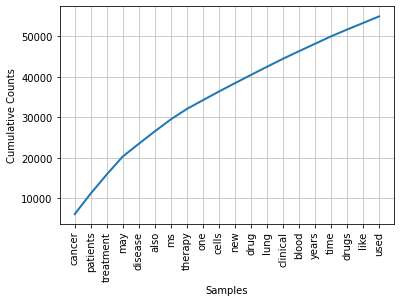

In [ ]:
# Acumulación de frecuencia de palabras.
freq_dist_no_stop_words.plot(20, cumulative=True);

Ahora veamos la frecuencia con la que aparecen las 10 palabras mas utilizadas en nuestros textos.

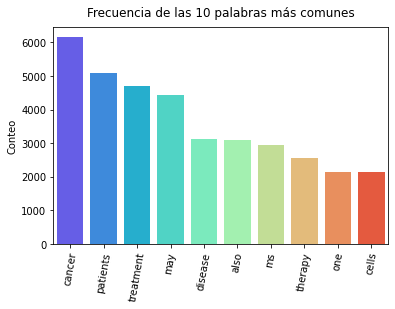

In [ ]:
#Gráfica de barras donde se muestra el número de ves que aparecen las palabras
most_common_10 = pd.DataFrame(freq_dist_no_stop_words.most_common(10))
fig = plt.figure()
ax = fig.add_subplot()
sns.barplot(x=most_common_10[0], y=most_common_10[1], ax=ax, palette='rainbow');
ax.set_title('Frecuencia de las 10 palabras más comunes', pad=10)
ax.set_ylabel('Conteo')
ax.set_xlabel('')
ax.tick_params(axis='x', rotation=80)

Veamos ahora la distribución de las longitudes de las palabras

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


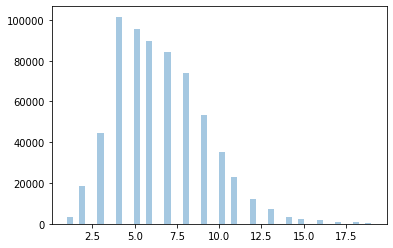

In [ ]:
# Número de letras de cada palabra.
word_lengths = pd.Series([len(w) for w in all_words_except_stop_words])
sns.distplot(word_lengths, kde=False, norm_hist=False);

## Nube de palabras

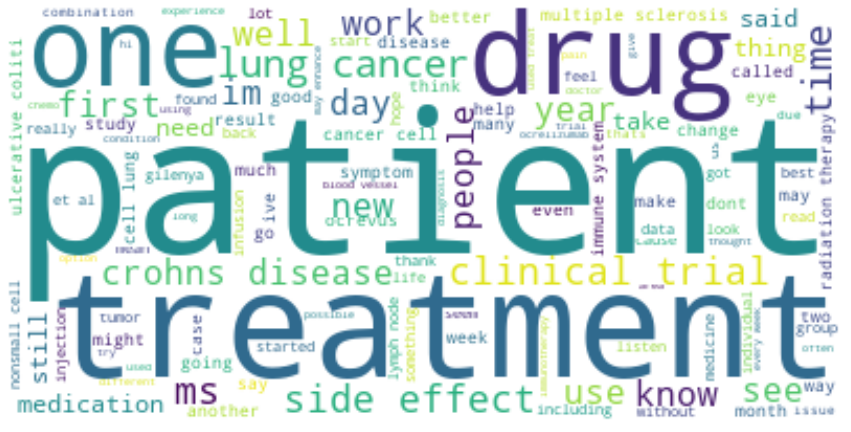

In [ ]:
#Visualización de las palabras en el texto.
word_cloud = WordCloud(max_font_size=100, background_color='white').generate(' '.join(all_words_except_stop_words))
plt.figure(figsize=(15,15))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Análisis de senimientos

In [ ]:
#Debido a que en nuestro texto fueron eliminados los puntos, el analisis de realiza para cada registro en general.
r=[]
for j in range(0,drogas.shape[0]):
  blob = TextBlob(drogas.iloc[j])
  r.append(blob.sentiment[0])



In [ ]:
#Agregamos la clasificación a cada uno de nuestros datos.
drogas_df=pd.DataFrame(drogas)

drogas_df['sentimiento']=r

In [ ]:
drogas_df

,text,sentimiento
0,previously stable on natalizumab with switchi...,-0.166667
1,on fingolimod and have been since december th...,0.000000
2,apparently its shingles i do have a few red s...,-0.041250
3,if the docetaxel doing once a week x weeks the...,-0.011616
4,cc stelara worked in a matter of days for me i...,0.101628
...,...,...
2919,reply posted for hippopostrous we are sorry to...,0.213636
2920,aw lorraine thats crap what a shame youve had ...,0.023431
2921,jskozio that sounds like nonsense to me exper...,0.068227
2922,it sounds like youre doing very well fg i woul...,0.152381


Notemos que son pocos los comentarios con clasificados como positivos, esto puede deberse a que en general se tratan de comentarios relacionados con enfermedades por lo que existe un contraste de palabras.

In [ ]:
#Sentimientos positivos
drogas_df[drogas_df['sentimiento']>.5]

,text,sentimiento
43,i have been on alecensa for months now with n...,0.800000
162,very good news about the pediatric fingolimod ...,0.670000
180,yeah youre fine i had tried azathioprine then ...,0.608333
214,if you are going to transition to another anti...,0.561111
303,lorry we have a similar journey my husband al...,0.533333
305,gilenya made me feel amazing after techfidera ...,0.700000
356,i was friends with you on facebook it is good ...,0.575000
365,dont worry bio drugs will take care of it im o...,0.566667
407,yes that is correct but is hsct superior to al...,0.700000
502,any idea when ocrelizumab will be available in...,0.550000
